In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# chargement des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


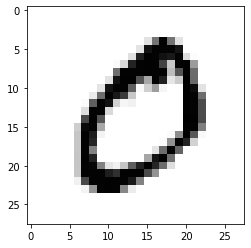

In [ ]:
# exemple d'affichage d'un image
plt.imshow(X_train_data[1], cmap='Greys')
plt.show()

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
### Partie A - Les données
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Téléchargement des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0] # N = 60 000 données

# Données d'apprentissage X
X_train = np.reshape(X_train_data,(N,784)) # vecteur image
X_train = X_train/255 # normalisation

# Données d'apprentissage Y vers une liste de taille 10
Y_train = to_categorical(Y_train_data, num_classes=10)
print(Y_train)
print(len(Y_train))
# Données de test
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
60000


In [ ]:
### Partie B - Le réseau de neurones
p = 8
modele = Sequential()

# Première couche : p neurones (entrée de dimension 784 = 28x28)
modele.add(Dense(p, input_dim=784, activation='sigmoid'))

# Deuxième couche : p neurones
modele.add(Dense(p, activation='sigmoid'))

# Couche de sortie : 1O neurones (un par chiffre)
modele.add(Dense(10, activation='softmax'))

# Choix de la méthode de descente de gradient
modele.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
print(modele.summary())

In [ ]:
### Partie C - Calcul des poids par descente de gradient

modele.fit(X_train, Y_train, batch_size=32, epochs=40)

In [ ]:
### Partie D - Résultats

resultat = modele.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])

Valeur de lerreur sur les données de test (loss): 0.34851208329200745
Précision sur les données de test (accuracy): 0.9067000150680542


Sortie réseau [1.4822747e-04 1.0486662e-03 1.0257023e-04 1.7465197e-04 1.3116178e-01
 4.5501357e-03 1.5489562e-04 6.6435061e-02 1.1030567e-03 7.9512095e-01]
Chiffre attendu : 9
Chiffre prédit : 9


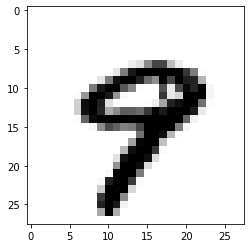

In [ ]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)
# Un exemple
i = 9 # numéro de l'image
chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)
plt.imshow(X_test_data[i], cmap='Greys')
plt.show()